In [4]:
import pandas as pd
import numpy as np

#import Linear Regression Machine Learning Library

from sklearn.linear_model import LinearRegression

car_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names=[
    "symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","wheel_bases","length","width","height","curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"
])
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_bases,88.6,88.6


In [5]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_bases          float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
car_df = car_df.drop("make",axis=1) #dropping make here but in real project,may separate data based on make
#The difference makes in same data set may not be a good idea.

#dropping following columns due to low variance filter. i.e. an attribute which is mostly one type of data is not a good dimesion
car_df = car_df.drop("fuel_type",axis=1)
car_df = car_df.drop("engine_location",axis=1)
car_df = car_df.drop("num_of_doors",axis=1)
car_df = car_df.drop("body_style",axis=1)
car_df = car_df.drop("drive_wheels",axis=1)
car_df = car_df.drop("engine_type",axis=1)
car_df = car_df.drop("fuel_system",axis=1)
car_df = car_df.drop("aspiration",axis=1)
car_df = car_df.drop("normalized_losses",axis=1)

In [6]:
car_df.dtypes

symboling              int64
wheel_bases          float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [7]:
#Replace the string numbers into numerical values for number of cylinders
car_df['cylinder'] = car_df['num_of_cylinders'].replace(
{
    'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12,'thirteen':13
})
car_df['cylinder']
#car_df.dtypes

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder, Length: 205, dtype: int64

In [9]:
car_df = car_df.replace('?',np.nan) #replace ? with NA which is equivalent of NULL
#car_df[car_df.isnull().any(axis=1)] #diplay record with 'NA'
car_df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
symboling,3,3,1,2,2,2,1,1,1,0
wheel_bases,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5
length,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2
width,64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4,67.9
height,48.8,48.8,52.4,54.3,54.3,53.1,55.7,55.7,55.9,52.0
curb_weight,2548,2548,2823,2337,2824,2507,2844,2954,3086,3053
num_of_cylinders,four,four,six,four,five,five,five,five,five,five
engine_size,130,130,152,109,136,136,136,136,131,131
bore,3.47,3.47,2.68,3.19,3.19,3.19,3.19,3.19,3.13,3.13
stroke,2.68,2.68,3.47,3.40,3.40,3.40,3.40,3.40,3.40,3.40


In [10]:
#change the attribute types from object to float type (generic numeric types)
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df['peak_rpm'] = car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

In [11]:
car_df.dtypes

symboling              int64
wheel_bases          float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [18]:
#Fill up NaN is numeric column with median values of those columns respectively
car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())

In [19]:
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_bases,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


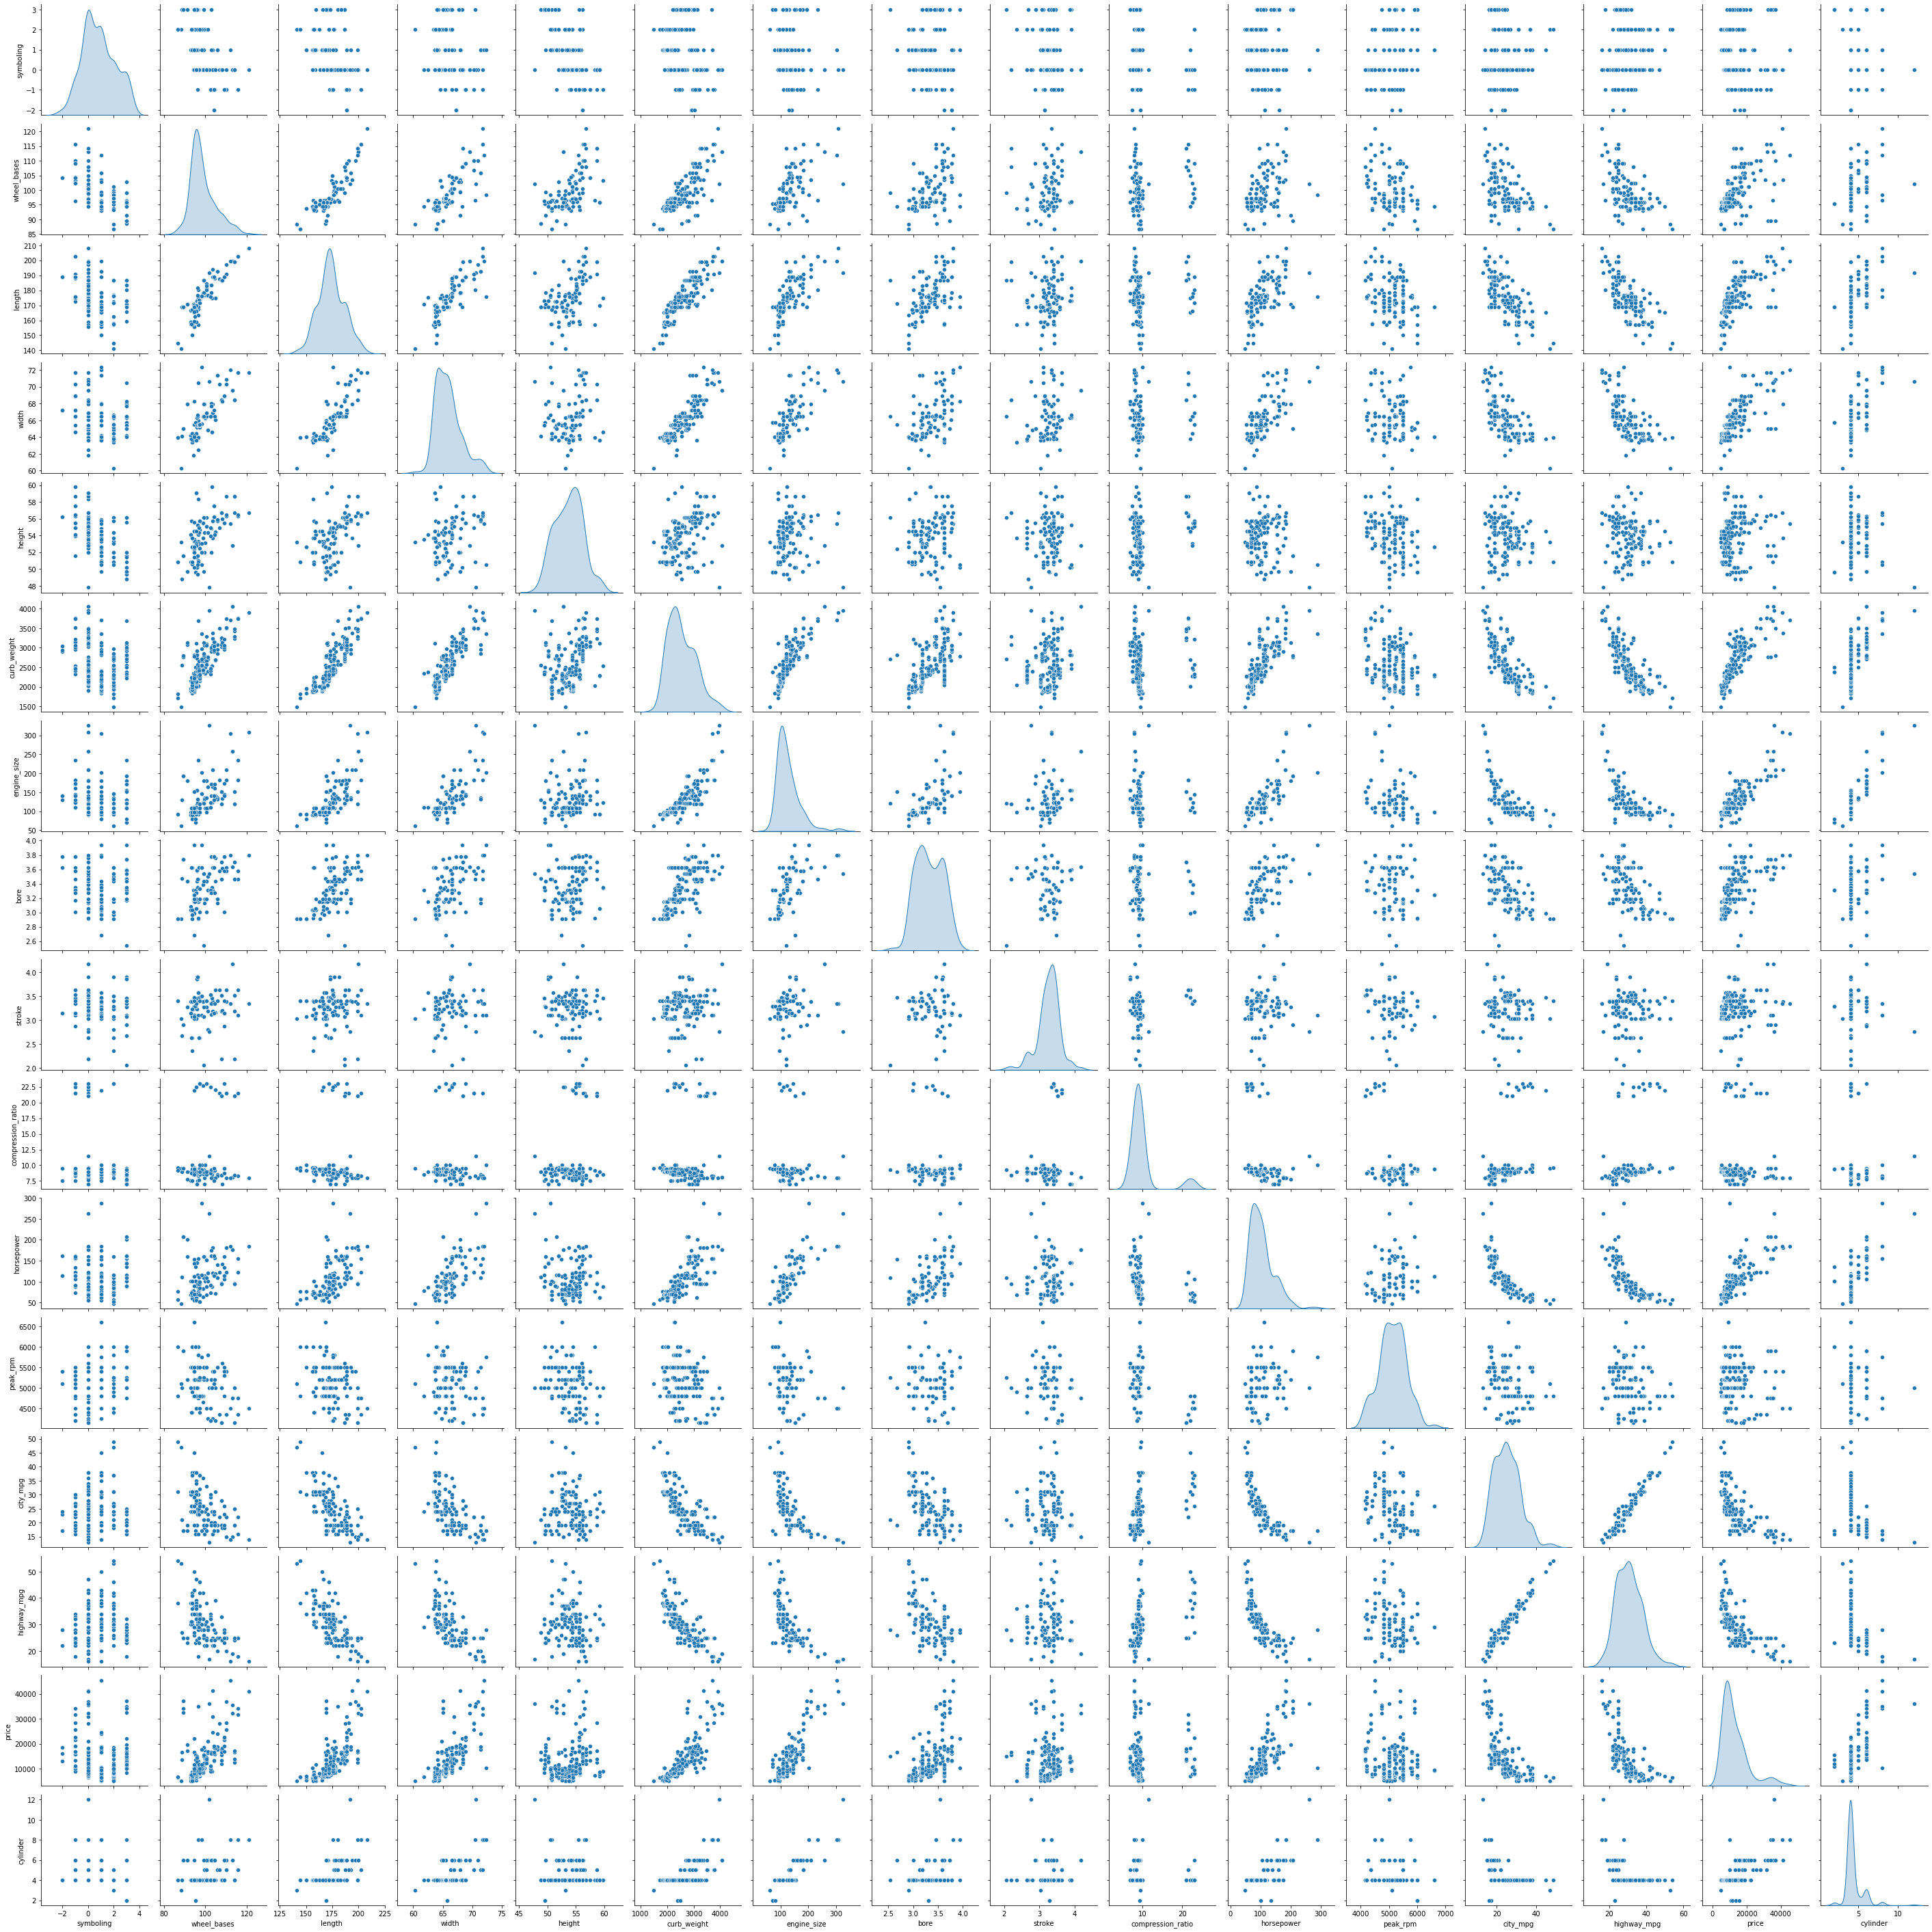

In [20]:
#importing seaborn for statistical plots
import seaborn as sns

sns.pairplot(car_df,diag_kind='kde')

did not consider other attributes such as number of doors,engine location etc due to low variance filter concept

pair plot shows clearly some relation between price and height,curb weight,engine size,number of cylinders,horsepower 
and inversly related to mpg

The data seems to be a mix of cars of high end and economy leading to cluster of points at lower end in many of the 
attributes,leading to a long tail in multiple attributes

In this context a decision tree and linear regression could be a good start.

In [21]:
#Copy all the predictor variable into X datafram. Since 'price' is dependent variable drop it

X = car_df.drop('price',axis=1)

X = X.drop('num_of_cylinders',axis=1)#Removing this column as we have created another column "culinder" out of this

#Copy the "price" column alone into the y dataframe.This is the dependent variable

y = car_df[['price']]

In [22]:
#Let us break the X and y dataframes into training set and test set. For this we will user
#SkLearn package's data splitting function which is based on radom function

from sklearn.model_selection import train_test_split

In [23]:
#split X and y into taining and test set in 75:25 ratio

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
#invoke tha LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [29]:
#Let us explore the coefficients for each of the independent attributes

for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for symboling is 88.57794900973279
The coefficient for wheel_bases is 71.82402760934701
The coefficient for length is -93.38447872011889
The coefficient for width is 479.8164355926815
The coefficient for height is 315.20384001212176
The coefficient for curb_weight is -0.8657326891351541
The coefficient for engine_size is 251.7436258279207
The coefficient for bore is -6832.550987635426
The coefficient for stroke is -5085.818859790595
The coefficient for compression_ratio is 335.7682519296409
The coefficient for horsepower is -0.038987961312704496
The coefficient for peak_rpm is 2.4300494935823354
The coefficient for city_mpg is -201.81713200347318
The coefficient for highway_mpg is -41.93431935731779
The coefficient for cylinder is -3176.176090372966


In [30]:
#Let us check intercept of the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -12323.060174569484


In [31]:
regression_model.score(X_test,y_test)

0.8362176483290366